In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Ames_Housing_Data.csv')

In [5]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

In [33]:
df.isnull().sum().sort_values(ascending = False)

Pool QC         2915
Misc Feature    2822
Alley           2729
Fence           2355
Fireplace Qu    1422
                ... 
MS SubClass        0
Central Air        0
1st Flr SF         0
2nd Flr SF         0
SalePrice          0
Length: 81, dtype: int64

In [11]:
df.corr()['SalePrice'].sort_values()

PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0.647877
Gr Liv Area        0

<AxesSubplot:xlabel='Overall Qual', ylabel='SalePrice'>

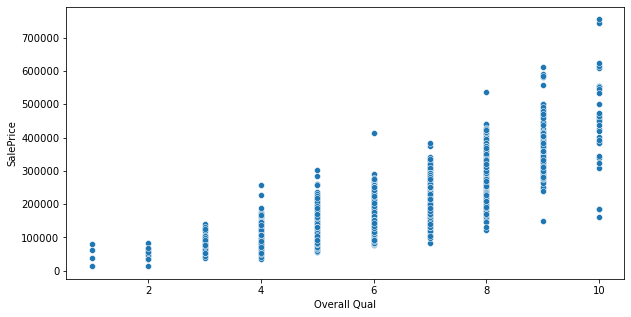

In [13]:
plt.figure(figsize = (10,5))
sns.scatterplot(data = df, x ='Overall Qual', y = 'SalePrice' )

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

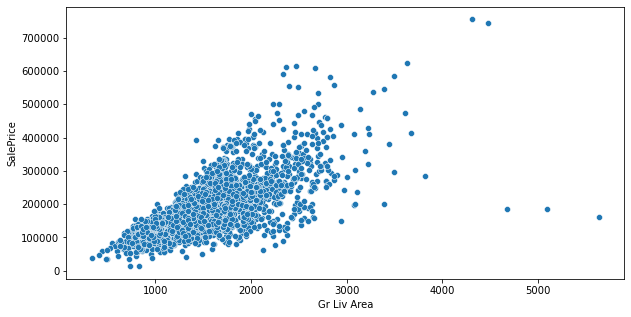

In [14]:
plt.figure(figsize = (10,5))
sns.scatterplot(data = df, x ='Gr Liv Area', y = 'SalePrice' )

In [ ]:
df[(df['Overall Qual'] > 8) & (df['SalePrice'] < 200000)]

In [21]:
outlier = df[(df['Gr Liv Area'] > 4000) & (df['SalePrice'] < 200000)]

In [24]:
df = df.drop(outlier.index, axis = 0)

In [37]:
def missin(data):
    mis = df.isnull().sum()
    mis = mis[mis > 0].sort_values()
    return mis
mymiss = missin(df)
mymiss

Electrical           1
Garage Area          1
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 1         1
BsmtFin SF 2         1
Garage Cars          1
Bsmt Full Bath       2
Bsmt Half Bath       2
Mas Vnr Area        23
Mas Vnr Type        23
BsmtFin Type 1      80
Bsmt Qual           80
Bsmt Cond           80
BsmtFin Type 2      81
Bsmt Exposure       83
Garage Type        157
Garage Finish      159
Garage Qual        159
Garage Cond        159
Garage Yr Blt      159
Lot Frontage       490
Fireplace Qu      1422
Fence             2355
Alley             2729
Misc Feature      2822
Pool QC           2915
dtype: int64

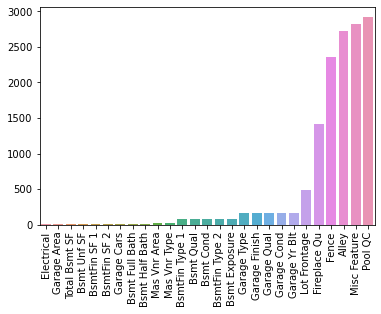

In [43]:
sns.barplot(x = mymiss.index, y = mymiss)
plt.xticks(rotation = 90);

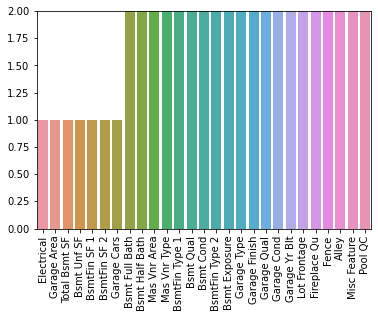

In [51]:
sns.barplot(x = mymiss.index, y = mymiss)
plt.xticks(rotation = 90)
plt.ylim(0,2);

In [55]:
df = df.dropna(axis = 0, subset= ['PID','Electrical','Garage Area'])

In [56]:
mymiss = missin(df)

In [57]:
mymiss

Bsmt Unf SF          1
Total Bsmt SF        1
BsmtFin SF 2         1
BsmtFin SF 1         1
Bsmt Full Bath       2
Bsmt Half Bath       2
Mas Vnr Type        23
Mas Vnr Area        23
Bsmt Qual           80
Bsmt Cond           80
BsmtFin Type 1      80
BsmtFin Type 2      81
Bsmt Exposure       83
Garage Type        157
Garage Qual        158
Garage Cond        158
Garage Finish      158
Garage Yr Blt      158
Lot Frontage       490
Fireplace Qu      1420
Fence             2354
Alley             2727
Misc Feature      2820
Pool QC           2913
dtype: int64

In [61]:
import warnings
warnings.simplefilter('ignore')

In [62]:
bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath','Mas Vnr Area']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

In [63]:
bsmt_str_cols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2','Mas Vnr Type']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

In [64]:
mymiss = missin(df)
mymiss

Garage Type       157
Garage Yr Blt     158
Garage Finish     158
Garage Qual       158
Garage Cond       158
Lot Frontage      490
Fireplace Qu     1420
Fence            2354
Alley            2727
Misc Feature     2820
Pool QC          2913
dtype: int64

In [65]:
gar_str_cols = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
df[gar_str_cols] = df[gar_str_cols].fillna('None')

In [66]:
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

In [67]:
mymiss = missin(df)
mymiss

Lot Frontage     490
Fireplace Qu    1420
Fence           2354
Alley           2727
Misc Feature    2820
Pool QC         2913
dtype: int64

In [68]:
df = df.drop(['Pool QC','Misc Feature','Alley','Fence'],axis=1)

In [69]:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna("None")

In [72]:
df.groupby('Neighborhood').mean()['Lot Frontage']

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

In [73]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean()))

In [74]:
mymiss = missin(df)
mymiss

Lot Frontage    3
dtype: int64

In [75]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

In [76]:
mymiss = missin(df)
mymiss

Series([], dtype: int64)

In [77]:
df.to_csv('housingdata.csv')